<div style="max-width:66ch;">

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon.

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.


In [45]:
import seaborn as sns

mpg = sns.load_dataset("mpg")

print(mpg.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [46]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [47]:
mpg.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000



&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 


In [48]:
relevant_columns = ["mpg", "cylinders", "horsepower", "weight", "acceleration"]
mpg[relevant_columns].describe()


,mpg,cylinders,horsepower,weight,acceleration
count,398.000000,398.000000,392.000000,398.000000,398.000000
mean,23.514573,5.454774,104.469388,2970.424623,15.568090
std,7.815984,1.701004,38.491160,846.841774,2.757689
min,9.000000,3.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,75.000000,2223.750000,13.825000
50%,23.000000,4.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,126.000000,3608.000000,17.175000
max,46.600000,8.000000,230.000000,5140.000000,24.800000



&nbsp; c) Make some plots on some of the columns that you find interesting.

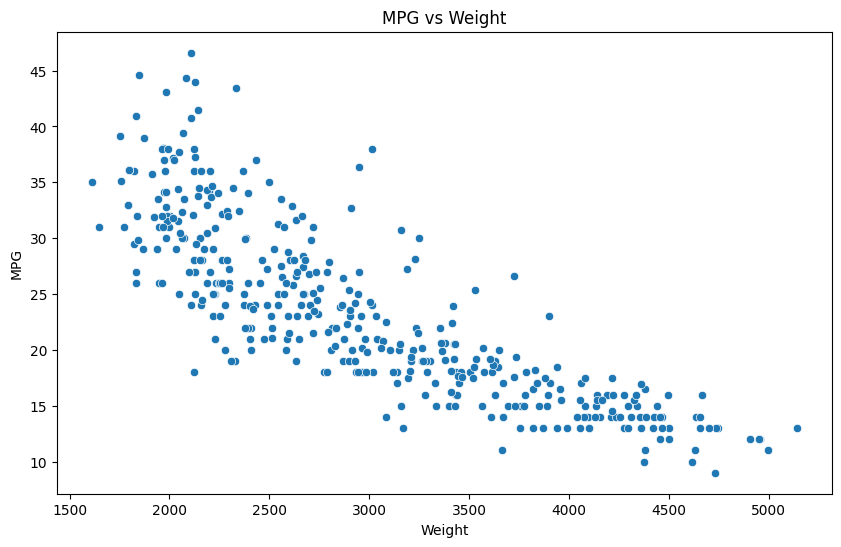

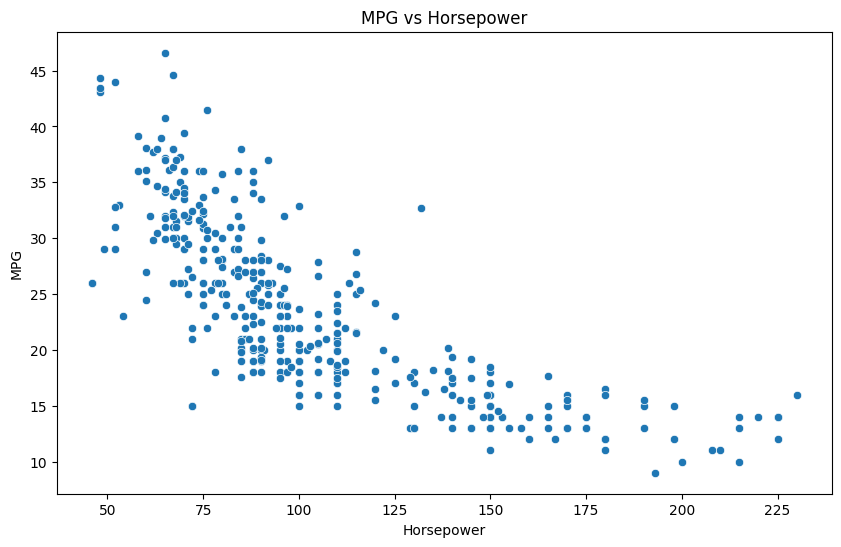

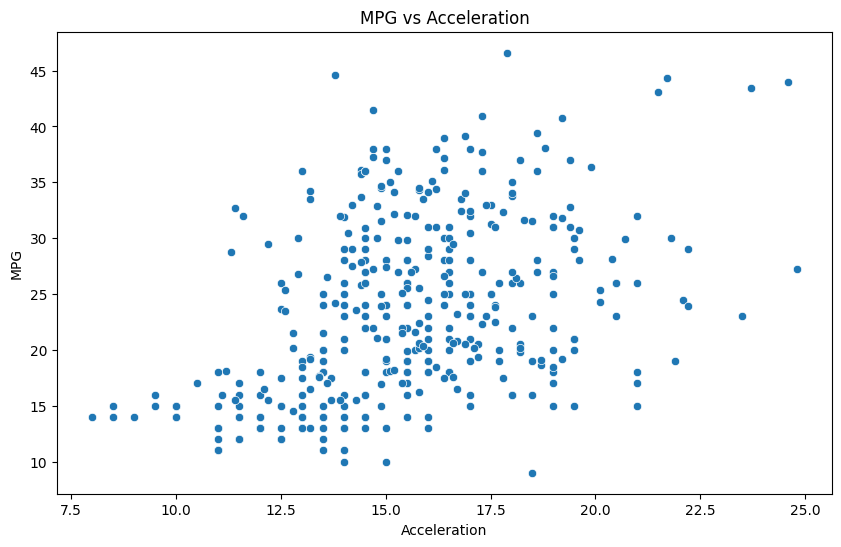

In [49]:
import matplotlib.pyplot as plt

mpg = sns.load_dataset("mpg")

# Scatter plot mellan 'mpg' och 'weight'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x='weight', y='mpg')
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

# Scatter plot mellan 'mpg' och 'horsepower'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x='horsepower', y='mpg')
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

# Boxplot av 'mpg' mot 'cylinders'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x='acceleration', y='mpg')
plt.title('MPG vs Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.show()



&nbsp; d) Check if there are any columns you might want to drop.

</div>

In [50]:
mpg = mpg.drop(columns=["model_year", "name", "origin", "displacement", "horsepower"])

print(mpg.head())


    mpg  cylinders  weight  acceleration
0  18.0          8    3504          12.0
1  15.0          8    3693          11.5
2  18.0          8    3436          11.0
3  16.0          8    3433          12.0
4  17.0          8    3449          10.5


In [51]:
mpg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


<div style="max-width:66ch;">

---

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

</div>

In [52]:
from sklearn.model_selection import train_test_split

X = mpg.drop(columns=["mpg"])
y = mpg["mpg"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"{X_train.shape = }")
print(f"{y_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (318, 3)
y_train.shape = (318,)
X_test.shape = (80, 3)
y_test.shape = (80,)


<div style="max-width:66ch;">

---

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

</div>

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def train_predict_evaluate(X_train, X_test, y_train, y_test, model):
    # Tränar modellen med träningsdatan
    model.fit(X_train, y_train)
    
    # Gör förutsägelser på testdatan
    predictions = model.predict(X_test)
    
    # Beräknar MAE, MSE, och RMSE
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

# Skapar linjär regressionsmodell
model = LinearRegression()


train_predict_evaluate(X_train, X_test, y_train, y_test, model)



MAE: 3.078158629666728
MSE: 14.48322626986545
RMSE: 3.8056834169259863


<div style="max-width:66ch;">

---

## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Stochastic gradient descent with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

---
</div>

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

mpg = sns.load_dataset("mpg")
mpg.dropna(inplace=True)
X = mpg.drop(['mpg', 'name', 'origin', 'displacement', 'model_year'], axis=1)
y = mpg['mpg']

# Uppdelning i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return {'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}


In [56]:
# Skapa och utvärdera modellerna
results = []

# Linjär regression (SVD)
lr = LinearRegression()
results.append(evaluate_model(lr, X_train, X_test, y_train, y_test, 'Linear Regression (SVD)'))

# Linjär regression (SVD) med skalade data
lr_scaled = make_pipeline(StandardScaler(), LinearRegression())
results.append(evaluate_model(lr_scaled, X_train, X_test, y_train, y_test, 'Linear Regression (SVD) with Scaled Data'))

# SGD med skalade data
sgd_scaled = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
results.append(evaluate_model(sgd_scaled, X_train, X_test, y_train, y_test, 'SGD with Scaled Data'))

# Polynomisk regression med olika grader
for degree in [1, 2, 3]:
    poly_lr = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    results.append(evaluate_model(poly_lr, X_train, X_test, y_train, y_test, f'Polynomial Degree {degree}'))

# Sammanställ resultat i en DataFrame
results_df = pd.DataFrame(results)

print(results_df.sort_values(by='RMSE'))



                                      Model       MAE        MSE      RMSE
4                       Polynomial Degree 2  3.044150  16.664501  4.082218
0                   Linear Regression (SVD)  3.455153  17.701621  4.207329
1  Linear Regression (SVD) with Scaled Data  3.455153  17.701621  4.207329
3                       Polynomial Degree 1  3.455153  17.701621  4.207329
2                      SGD with Scaled Data  3.438677  17.748841  4.212937
5                       Polynomial Degree 3  3.278534  20.885819  4.570101
